### **MultiThreading:**
- in multithreading we create multiple threads and execute them n a single processor(we have to wait for one program to complete for other thread to start)
- In **context switching** we don't have to wait for thread 1 to finish executing for other one to start. it will execute some part of thread1 then execute some of thread2 and so on.

### **MultiProcessing:**
- in multiprocessing we run multiple instances of a program parallely in different processor
- i.e for program 1 in processor 1, program2 in processor 2, program3 in processor 3, program 4 in processor 4 and so on.
- <u>Advantages of using multiprocessing:-</u>
 - for 4 core processor program will be executed in 1/4 amount of time
 - latency of progr5am will be reduced
 - multiple instances can be run in an easiest possible way
 - Any shared resources b/w two processors can be utilised

In [10]:
import multiprocessing
def multipross():
    print("This is my mutiprocessing prog")

#to execute above program with some other program-
#call a python mai program-which is responsible for executing everything inside our python compiler
if __name__=="__main__": #this __main__ envokes our entire python compileri.e python main module
    m= multiprocessing.Process(target=multipross)
    print("this is my main program")
    #above creates a child program inside a main program
    
    #starting program
    m.start()
    m.join() #waits until child process terminates

this is my main program
This is my mutiprocessing prog


**Q)** Create a function for squaring a number. distribute this into 5 processes using pool function:

In [12]:
def do_sqr(n):
    return(n**2) 

#creating child Program
if __name__=='__main__':
    with multiprocessing.Pool(10)as pool:
        out=pool.map(do_sqr,[2,4,65,5,8,9,9])
        print(out)

[4, 16, 4225, 25, 64, 81, 81]


Resource:- https://www.geeksforgeeks.org/multiprocessing-python-set-1/

# Multiprocessing in Python
### What is multiprocessing?
Multiprocessing refers to the ability of a system to support more than one processor at the same time

In [13]:
# importing the multiprocessing module
import multiprocessing
  
def print_cube(num):
    """
    function to print cube of given num
    """
    print("Cube: {}".format(num * num * num))
  
def print_square(num):
    """
    function to print square of given num
    """
    print("Square: {}".format(num * num))
  
if __name__ == "__main__":
    # creating processes
    p1 = multiprocessing.Process(target=print_square, args=(10, ))
    p2 = multiprocessing.Process(target=print_cube, args=(10, ))
  
    # starting process 1
    p1.start()
    # starting process 2
    p2.start()
    
  
    # wait until process 1 is finished
    p1.join()
    # wait until process 2 is finished
    p2.join()
  
    # both processes finished
    print("Done!")

Square: 100
Cube: 1000
Done!


In [14]:
#example:  program to understand the concept of different processes running on same python script
# importing the multiprocessing module
import multiprocessing
import os
  
def worker1():
    # printing process id
    print("ID of process running worker1: {}".format(os.getpid()))
  
def worker2():
    # printing process id
    print("ID of process running worker2: {}".format(os.getpid()))
  
if __name__ == "__main__":
    # printing main program process id
    print("ID of main process: {}".format(os.getpid()))
  
    # creating processes
    p1 = multiprocessing.Process(target=worker1)
    p2 = multiprocessing.Process(target=worker2)
  
    # starting processes
    p1.start()
    p2.start()
  
    # process IDs
    print("ID of process p1: {}".format(p1.pid))
    print("ID of process p2: {}".format(p2.pid))
  
    # wait until processes are finished
    p1.join()
    p2.join()
  
    # both processes finished
    print("Both processes finished execution!")
  
    # check if processes are alive
    print("Process p1 is alive: {}".format(p1.is_alive()))
    print("Process p2 is alive: {}".format(p2.is_alive()))

ID of main process: 103
ID of process running worker1: 2486
ID of process running worker2: 2489
ID of process p1: 2486
ID of process p2: 2489
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False


Consider the diagram to understand how new processes are different from main python script:
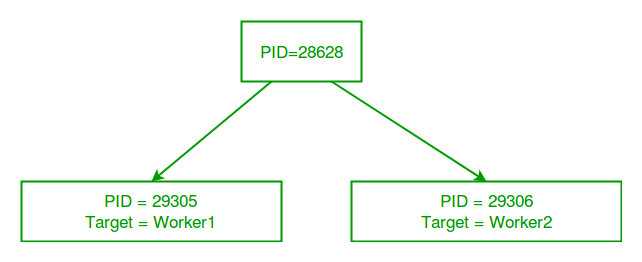

In [20]:
l=[1,2,3,4]
a = list(enumerate(l))
print(a)

[(0, 1), (1, 2), (2, 3), (3, 4)]


In [2]:
import multiprocessing
  
def square_list(mylist, result, square_sum):
    """
    function to square a given list
    """
    # append squares of mylist to result array
    for idx, num in enumerate(mylist):
        result[idx] = num * num
  
    # square_sum value
    square_sum.value = sum(result)
  
    # print result Array
    print("Result(in process p1): {}".format(result[:]))
  
    # print square_sum Value
    print("Sum of squares(in process p1): {}".format(square_sum.value))
  
if __name__ == "__main__":
    # input list
    mylist = [1,2,3,4]
  
    # creating Array of int data type with space for 4 integers
    result = multiprocessing.Array('i', 4)
  
    # creating Value of int data type
    square_sum = multiprocessing.Value('i')
  
    # creating new process
    p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum))
  
    # starting process
    p1.start()
  
    # wait until the process is finished
    p1.join()
  
    # print result array
    print("Result(in main program): {}".format(result[:]))
  
    # print square_sum Value
    print("Sum of squares(in main program): {}".format(square_sum.value))

Result(in process p1): [1, 4, 9, 16]
Sum of squares(in process p1): 30
Result(in main program): [1, 4, 9, 16]
Sum of squares(in main program): 30


##### Let us try to understand the above code line by line:

- First of all, we create an Array result like this:
  result = multiprocessing.Array('i', 4)
 - First argument is the data type. ‘i’ stands for integer whereas ‘d’ stands for float data type.
 - Second argument is the size of array. Here, we create an array of 4 elements.
 
Similarly, we create a Value square_sum like this:

 - square_sum = multiprocessing.Value('i')
 
Here, we only need to specify data type. The value can be given an initial value(say 10) like this:

 - square_sum = multiprocessing.Value('i', 10)
 
- Secondly, we pass result and square_sum as arguments while creating Process object.

 - p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum))
 
- result array elements are given a value by specifying index of array element.

 - for idx, num in enumerate(mylist):
      result[idx] = num * num
      
    square_sum is given a value by using its value attribute:

       square_sum.value = sum(result)
- In order to print result array elements, we use result[:] to print complete array.
  print("Result(in process p1): {}".format(result[:]))
  
    Value of square_sum is simply printed as:

      print("Sum of squares(in process p1): {}".format(square_sum.value))

Here is a diagram depicting how processes share Array and Value object:
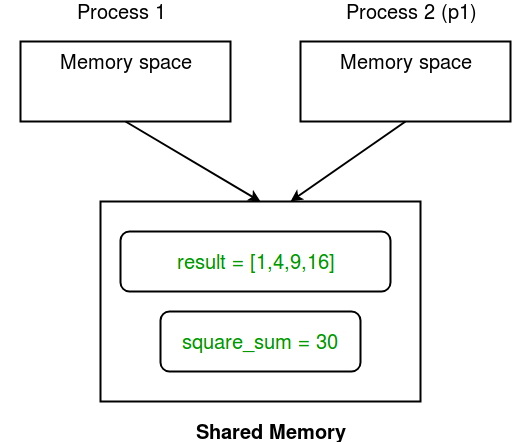

#### Server process : 
Whenever a python program starts, a server process is also started. From there on, whenever a new process is needed, the parent process connects to the server and requests it to fork a new proces

In [6]:
import multiprocessing
  
def print_records(records):
    """
    function to print record(tuples) in records(list)
    """
    for record in records:
        print("Name: {0}\nScore: {1}\n".format(record[0], record[1]))
  
def insert_record(record, records):
    """
    function to add a new record to records(list)
    """
    records.append(record)
    print("New record added!\n")
  
if __name__ == '__main__':
    with multiprocessing.Manager() as manager:
        # creating a list in server process memory
        records = manager.list([('Sam', 10), ('Adam', 9), ('Kevin',9)])
        # new record to be inserted in records
        new_record = ('Jeff', 8)
  
        # creating new processes
        p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
        p2 = multiprocessing.Process(target=print_records, args=(records,))
  
        # running process p1 to insert new record
        p1.start()
        p1.join()
  
        # running process p2 to print records
        p2.start()
        p2.join()

New record added!

Name: Sam
Score: 10

Name: Adam
Score: 9

Name: Kevin
Score: 9

Name: Jeff
Score: 8



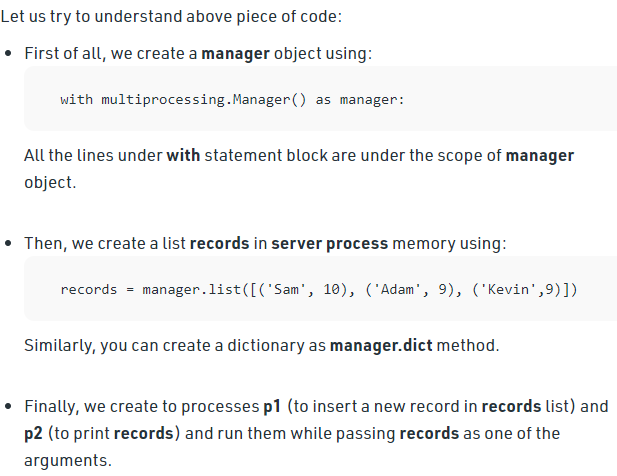

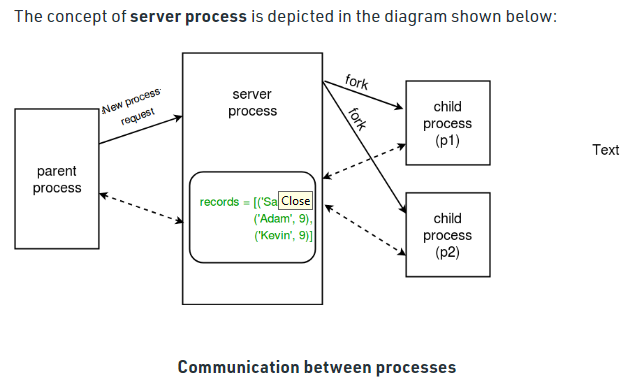

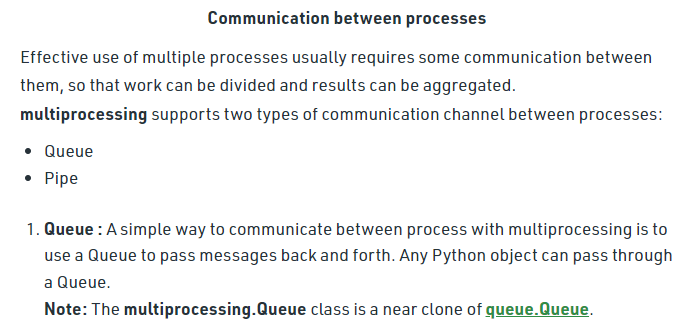

In [7]:
import multiprocessing
  
def square_list(mylist, q):
    """
    function to square a given list
    """
    # append squares of mylist to queue
    for num in mylist:
        q.put(num * num)
  
def print_queue(q):
    """
    function to print queue elements
    """
    print("Queue elements:")
    while not q.empty():
        print(q.get())
    print("Queue is now empty!")
  
if __name__ == "__main__":
    # input list
    mylist = [1,2,3,4]
  
    # creating multiprocessing Queue
    q = multiprocessing.Queue()
  
    # creating new processes
    p1 = multiprocessing.Process(target=square_list, args=(mylist, q))
    p2 = multiprocessing.Process(target=print_queue, args=(q,))
  
    # running process p1 to square list
    p1.start()
    p1.join()
  
    # running process p2 to get queue elements
    p2.start()
    p2.join()

Queue elements:
1
4
9
16
Queue is now empty!


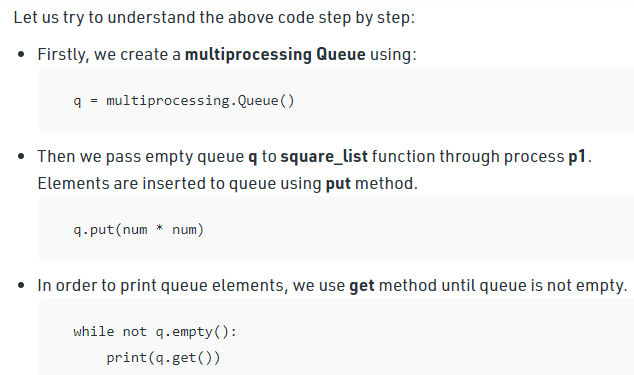

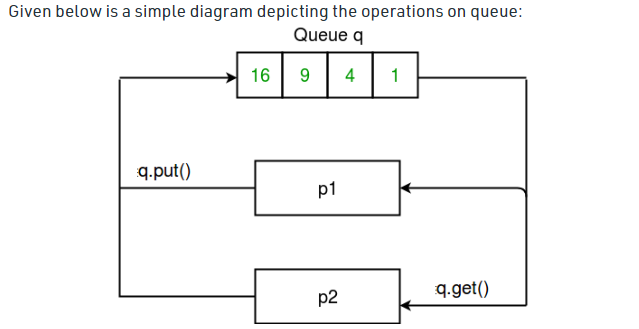

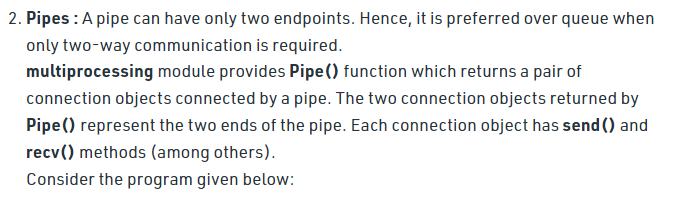

In [8]:
import multiprocessing
  
def sender(conn, msgs):
    """
    function to send messages to other end of pipe
    """
    for msg in msgs:
        conn.send(msg)
        print("Sent the message: {}".format(msg))
    conn.close()
  
def receiver(conn):
    """
    function to print the messages received from other
    end of pipe
    """
    while 1:
        msg = conn.recv()
        if msg == "END":
            break
        print("Received the message: {}".format(msg))
  
if __name__ == "__main__":
    # messages to be sent
    msgs = ["hello", "hey", "hru?", "END"]
  
    # creating a pipe
    parent_conn, child_conn = multiprocessing.Pipe()
  
    # creating new processes
    p1 = multiprocessing.Process(target=sender, args=(parent_conn,msgs))
    p2 = multiprocessing.Process(target=receiver, args=(child_conn,))
  
    # running processes
    p1.start()
    p2.start()
  
    # wait until processes finish
    p1.join()
    p2.join()

Sent the message: hello
Sent the message: heyReceived the message: hello

Sent the message: hru?Received the message: hey

Sent the message: ENDReceived the message: hru?



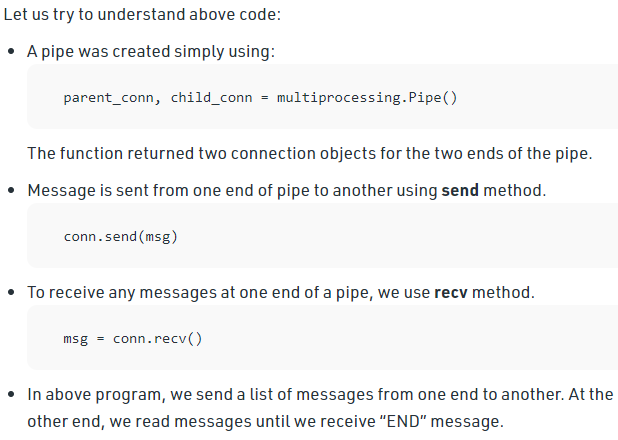

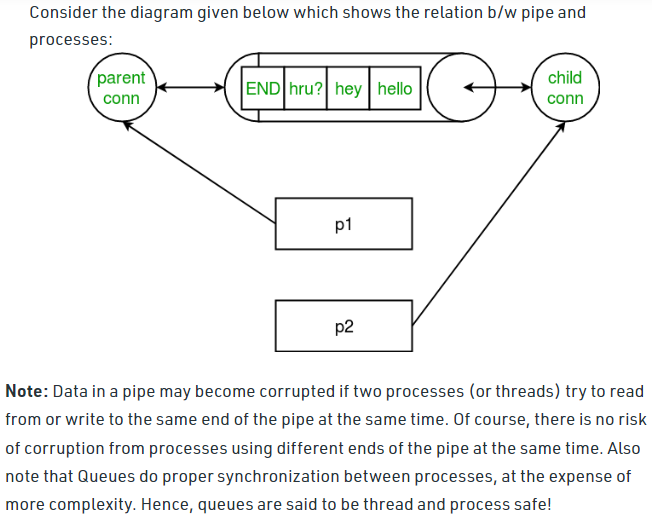

## Synchronization and Pooling of processes in Python
This article discusses two important concepts related to multiprocessing in Python:

- Synchronization between processes
- Pooling of processes


#### Synchronization between processes

Process synchronization is defined as a mechanism which ensures that two or more concurrent processes do not simultaneously execute some particular program segment known as critical section

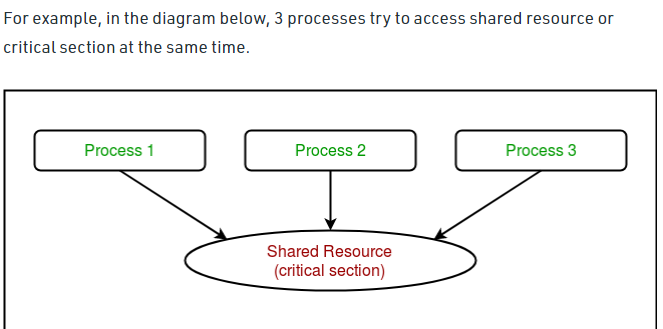

##### Concurrent accesses to shared resource can lead to race condition.

> A race condition occurs when two or more processes can access shared data and they try to change it at the same time. As a result, the values of variables may be unpredictable and vary depending on the timings of context switches of the processes.

In [19]:
# Python program to illustrate 
# the concept of race condition
# in multiprocessing
import multiprocessing
  
# function to withdraw from account
def withdraw(balance):    
    for _ in range(10000):
        balance.value = balance.value - 1
  
# function to deposit to account
def deposit(balance):    
    for _ in range(10000):
        balance.value = balance.value + 1
  
def perform_transactions():
  
    # initial balance (in shared memory)
    balance = multiprocessing.Value('i', 100)
  
    # creating new processes
    p1 = multiprocessing.Process(target=withdraw, args=(balance,))
    p2 = multiprocessing.Process(target=deposit, args=(balance,))
  
    # starting processes
    p1.start()
    p2.start()
  
    # wait until processes are finished
    p1.join()
    p2.join()
  
    # print final balance
    print("Final balance = {}".format(balance.value))
  
if __name__ == "__main__":
    for _ in range(10):
  
        # perform same transaction process 10 times
        perform_transactions()

Final balance = 803
Final balance = -479
Final balance = 231
Final balance = 582
Final balance = 439
Final balance = -133
Final balance = -300
Final balance = 399
Final balance = -293
Final balance = 297


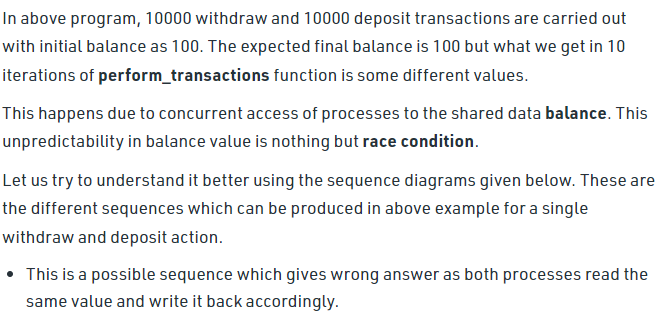

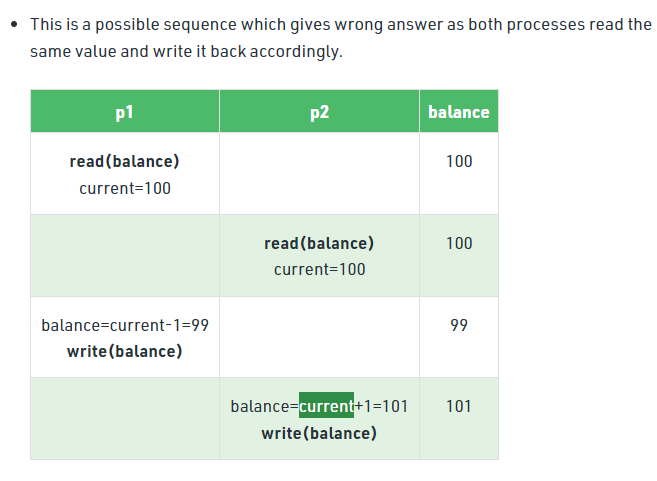

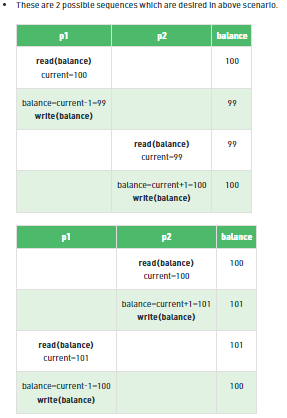

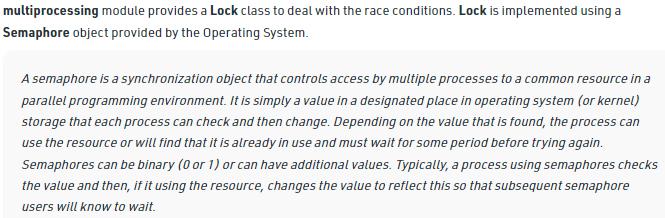

In [20]:
# Python program to illustrate 
# the concept of locks
# in multiprocessing
import multiprocessing
  
# function to withdraw from account
def withdraw(balance, lock):    
    for _ in range(10000):
        lock.acquire()
        balance.value = balance.value - 1
        lock.release()
  
# function to deposit to account
def deposit(balance, lock):    
    for _ in range(10000):
        lock.acquire()
        balance.value = balance.value + 1
        lock.release()
  
def perform_transactions():
  
    # initial balance (in shared memory)
    balance = multiprocessing.Value('i', 100)
  
    # creating a lock object
    lock = multiprocessing.Lock()
  
    # creating new processes
    p1 = multiprocessing.Process(target=withdraw, args=(balance,lock))
    p2 = multiprocessing.Process(target=deposit, args=(balance,lock))
  
    # starting processes
    p1.start()
    p2.start()
  
    # wait until processes are finished
    p1.join()
    p2.join()
  
    # print final balance
    print("Final balance = {}".format(balance.value))
  
if __name__ == "__main__":
    for _ in range(10):
  
        # perform same transaction process 10 times
        perform_transactions()

Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100


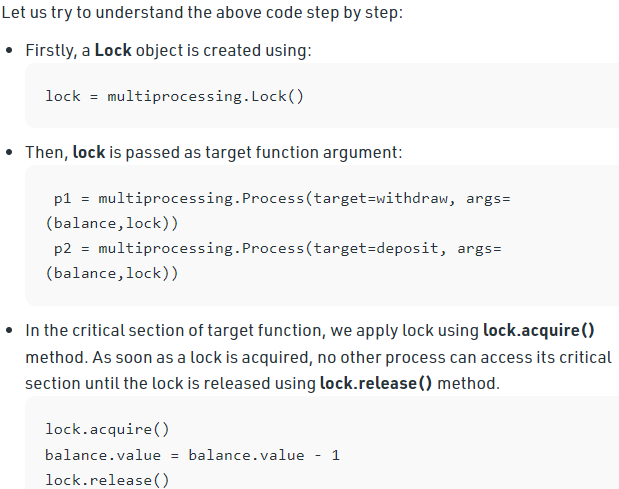

As you can see in the results, the final balance comes out to be 100 every time (which is the expected final result).

## Pooling between processes

In [21]:

# Python program to find 
# squares of numbers in a given list
def square(n):
    return (n*n)
  
if __name__ == "__main__":
  
    # input list
    mylist = [1,2,3,4,5]
  
    # empty list to store result
    result = []
  
    for num in mylist:
        result.append(square(num))
  
    print(result)

[1, 4, 9, 16, 25]


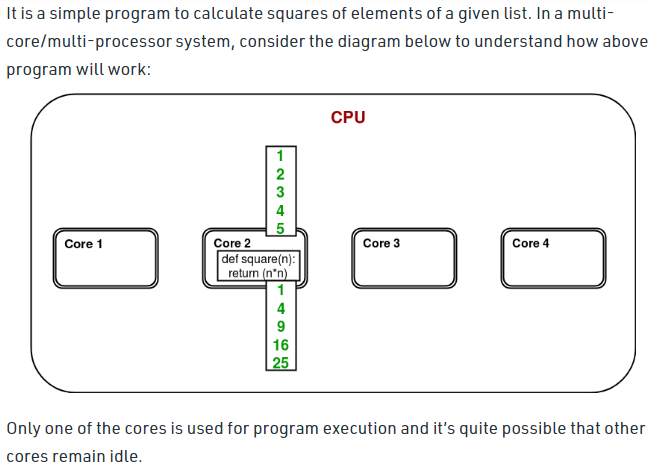

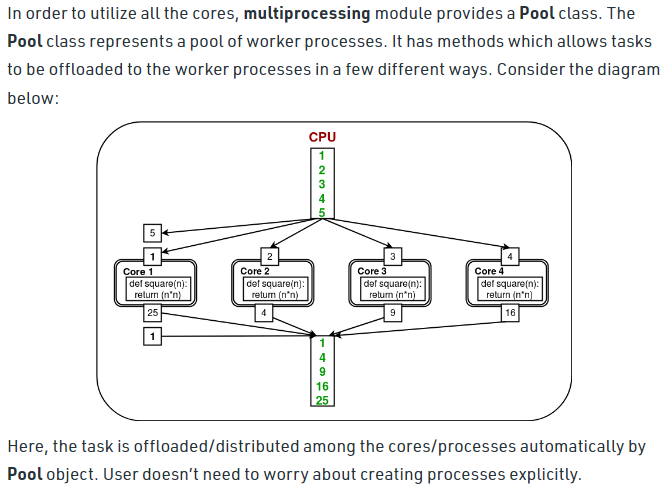

In [23]:

# Python program to understand 
# the concept of pool
import multiprocessing
import os
  
def square(n):
    print("Worker process id for {0}: {1}".format(n, os.getpid()))
    return (n*n)
  
if __name__ == "__main__":
    # input list
    mylist = [1,2,3,4,5]
  
    # creating a pool object
    p = multiprocessing.Pool()
  
    # map list to target function
    result = p.map(square, mylist)
  
    print(result)

Worker process id for 1: 3168Worker process id for 2: 3169Worker process id for 3: 3170


Worker process id for 4: 3171Worker process id for 5: 3172

[1, 4, 9, 16, 25]
